# Project Title : Diabetes

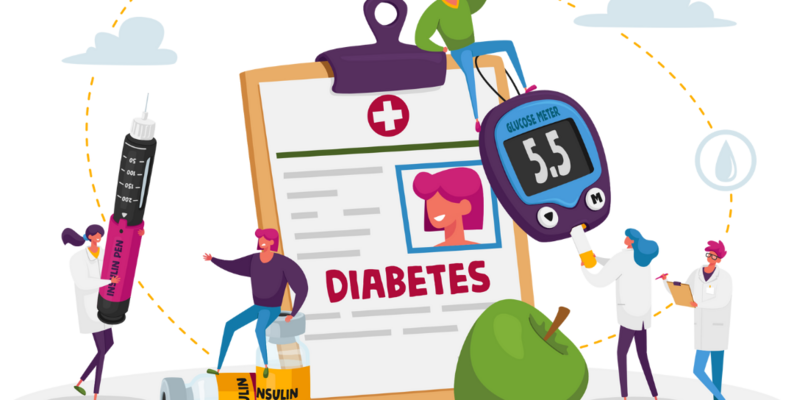

In [2]:
from IPython.display import Image
Image(filename='dataset-cover.png')

## Project Overview : 
### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.e (0 or 1)

## Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Pregnancies: Number of times pregnant
### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
### BloodPressure: Diastolic blood pressure (mm Hg)
### SkinThickness: Triceps skin fold thickness (mm)
### Insulin: 2-Hour serum insulin (mu U/ml)
### BMI: Body mass index (weight in kg/(height in m)^2)
### DiabetesPedigreeFunction: Diabetes pedigree function
### Age: Age (years)
### Outcome: Class variable (0 or 1)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,recall_score ,f1_score
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("diabetes.csv")

## Explore Data

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.shape

(768, 9)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [103]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [104]:
df.duplicated().sum()

0

## Data Analysis

<Axes: >

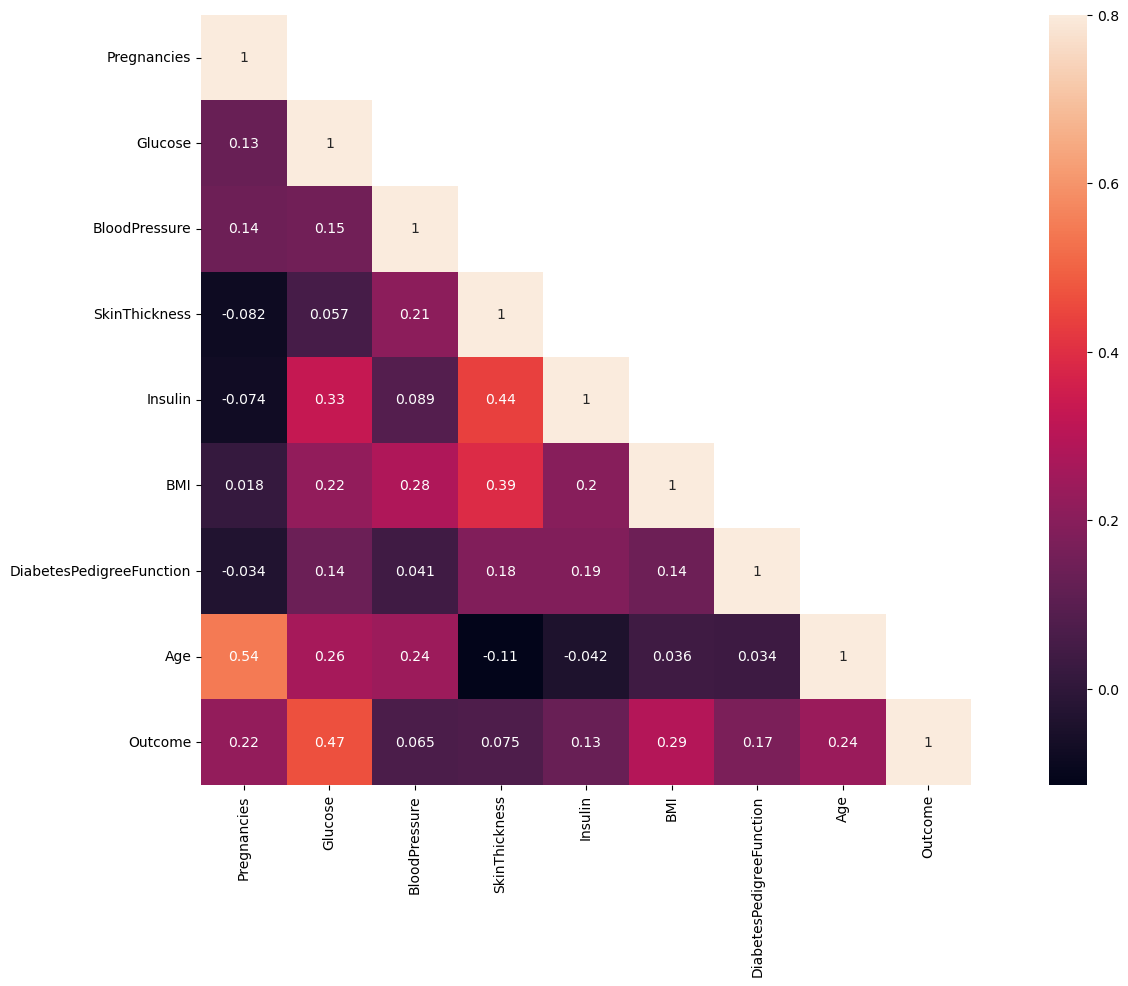

In [105]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<Axes: xlabel='Outcome', ylabel='count'>

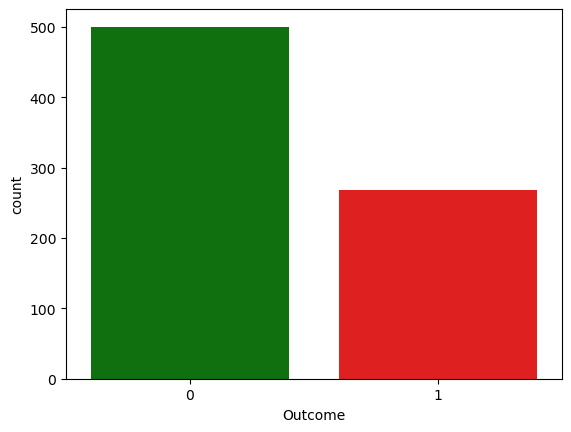

In [106]:
sn.countplot(x='Outcome',data=df,palette=['g','r'])

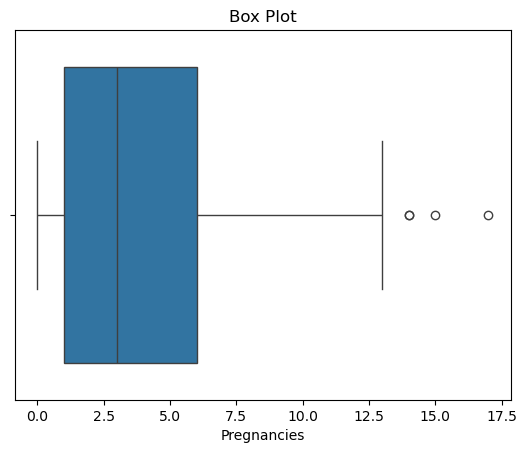

In [107]:
plt.subplots(1)
plt.title('Box Plot')
sn.boxplot(x=df['Pregnancies'])
plt.show()

In [108]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

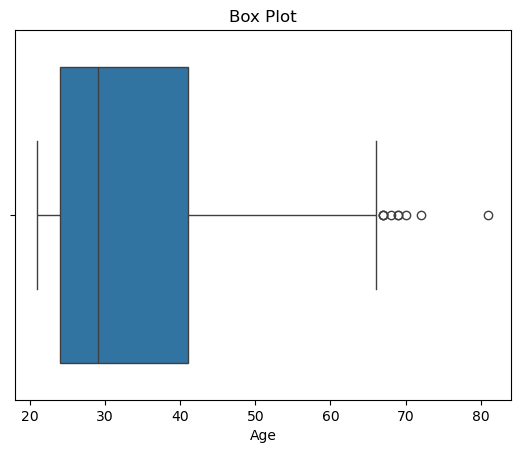

In [109]:
plt.subplots(1)
plt.title('Box Plot')
sn.boxplot(x=df['Age'])
plt.show()

In [110]:
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

## Creating Model

In [111]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=1234)

In [113]:
m1=LogisticRegression()
m2=SVC()
m3=RandomForestClassifier()
m4=GradientBoostingClassifier(n_estimators=1000)

In [114]:
columns = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
all_accuracies=[]
all_recalls=[]
all_f1=[]

In [115]:
def func(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(pred,y_test)
    recall = recall_score(pred,y_test)
    f1 = f1_score(pred,y_test)

    all_accuracies.append(accuracy)
    all_recalls.append(recall)
    all_f1.append(f1)
     
    conf_mat = sn.heatmap(confusion_matrix(pred,y_test),annot=True)
    print(model)
    print('accuracy : ',accuracy)
    print('recall : ',recall)
    print('f1 : ',f1)
    print('conf_mat : ',conf_mat)



LogisticRegression()
accuracy :  0.7727272727272727
recall :  0.7631578947368421
f1 :  0.6236559139784946
conf_mat :  Axes(0.125,0.11;0.62x0.77)


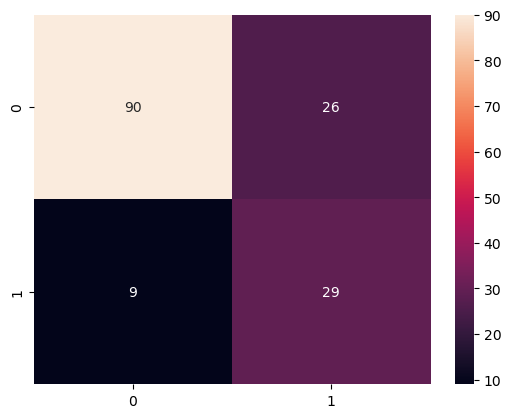

In [116]:
func(m1)

SVC()
accuracy :  0.7467532467532467
recall :  0.8076923076923077
f1 :  0.5185185185185185
conf_mat :  Axes(0.125,0.11;0.62x0.77)


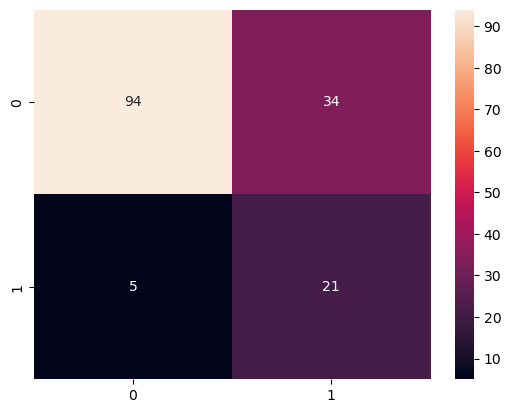

In [117]:
func(m2)

RandomForestClassifier()
accuracy :  0.7532467532467533
recall :  0.717948717948718
f1 :  0.5957446808510638
conf_mat :  Axes(0.125,0.11;0.62x0.77)


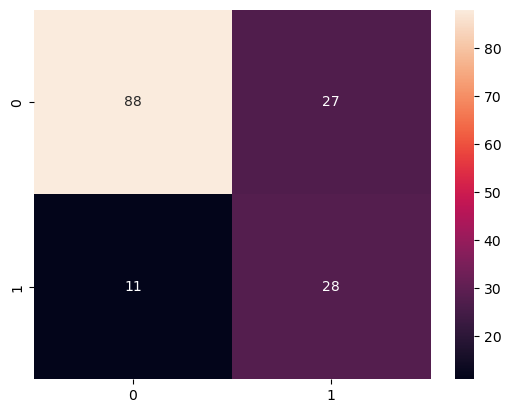

In [118]:
func(m3)

GradientBoostingClassifier(n_estimators=1000)
accuracy :  0.7337662337662337
recall :  0.6521739130434783
f1 :  0.594059405940594
conf_mat :  Axes(0.125,0.11;0.62x0.77)


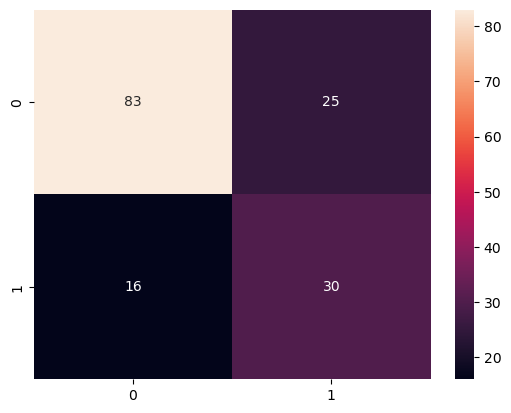

In [119]:
func(m4)

In [120]:
all_accuracies

[0.7727272727272727,
 0.7467532467532467,
 0.7532467532467533,
 0.7337662337662337]

In [121]:
all_recalls

[0.7631578947368421, 0.8076923076923077, 0.717948717948718, 0.6521739130434783]

In [122]:
all_f1

[0.6236559139784946, 0.5185185185185185, 0.5957446808510638, 0.594059405940594]

In [123]:
result=pd.DataFrame({'Algorithms':columns,'accuracies':all_accuracies,'recalls':all_recalls,'f1':all_f1,})
result

,Algorithms,accuracies,recalls,f1
0,LogisticRegression,0.772727,0.763158,0.623656
1,SVC,0.746753,0.807692,0.518519
2,RandomForestClassifier,0.753247,0.717949,0.595745
3,GradientBoostingClassifier,0.733766,0.652174,0.594059


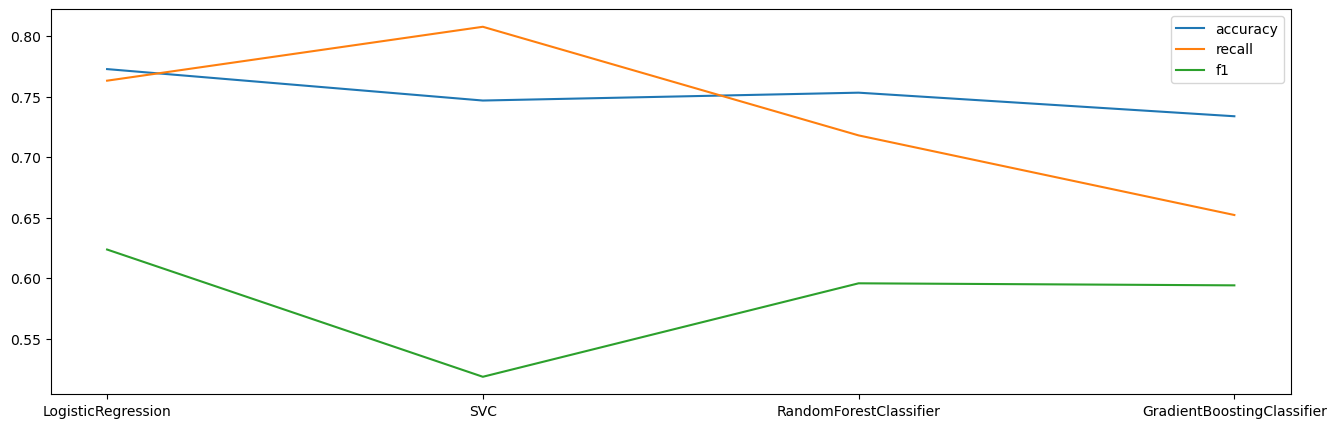

In [128]:
fig,ax=plt.subplots(figsize=(16,5))
plt.plot(result.Algorithms,all_accuracies,label='accuracy')
plt.plot(result.Algorithms,all_recalls,label='recall')
plt.plot(result.Algorithms,all_f1,label='f1')
plt.legend()

plt.show()